In [10]:
#Import libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pwd

'C:\\Users\\deepa'

### Importing Data

In [47]:
#Load the dataset 
df = pd.read_csv('results.csv')
df

,name,hour,ts,high
0,bynd,9,12/1/2020 9:30,140.777298
1,bynd,10,12/1/2020 10:10,137.354996
2,bynd,11,12/1/2020 11:38,138.089996
3,bynd,12,12/1/2020 12:24,138.580002
4,bynd,13,12/1/2020 13:21,138.800003
...,...,...,...,...
78,ttd,12,12/1/2020 12:19,881.760010
79,ttd,13,12/1/2020 13:33,886.234070
80,ttd,14,12/1/2020 14:42,887.000000
81,ttd,15,12/1/2020 15:58,891.520019


In [59]:
#Checking the top rows of the dataset to see how data is available 
df.head()

,name,hour,ts,high
0,bynd,9,12/1/2020 9:30,140.777298
1,bynd,10,12/1/2020 10:10,137.354996
2,bynd,11,12/1/2020 11:38,138.089996
3,bynd,12,12/1/2020 12:24,138.580002
4,bynd,13,12/1/2020 13:21,138.800003


In [58]:
#Total number of rows and columns
df.shape

(83, 4)

In [5]:
df.value_counts()

name  hour  ts               high      
ttd   9     12/1/2020 9:30   905.000000    4
ddog  9     12/1/2020 9:30   98.800003     3
ttd   15    12/1/2020 15:58  891.520019    2
okta  9     12/1/2020 9:30   244.270004    2
nflx  14    12/1/2020 14:09  507.390015    2
                                          ..
pins  12    12/1/2020 12:12  69.059998     1
      11    12/1/2020 11:41  69.160004     1
      10    12/1/2020 10:58  68.699997     1
      9     12/1/2020 9:35   70.320000     1
bynd  9     12/1/2020 9:30   140.777298    1
Length: 70, dtype: int64

In [6]:
#describe: summary statistics
df.describe()

,hour,high
count,83.000000,83.000000
mean,11.903614,404.710147
std,2.081360,363.158448
min,9.000000,44.279701
25%,10.000000,98.800003
50%,12.000000,238.769898
75%,14.000000,695.355011
max,15.000000,1085.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    83 non-null     object 
 1   hour    83 non-null     int64  
 2   ts      83 non-null     object 
 3   high    83 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.7+ KB


In [8]:
# checking for null values
df.isna()

,name,hour,ts,high
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
78,False,False,False,False
79,False,False,False,False
80,False,False,False,False
81,False,False,False,False


In [9]:
#Display column names
df.columns

Index(['name', 'hour', 'ts', 'high'], dtype='object')

In [56]:
#Chceking for duplicate values
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
78    False
79    False
80    False
81    False
82     True
Length: 83, dtype: bool

In [60]:
highest = df.groupby('name').max()['high'].to_frame()
print(highest.head())

            high
name            
bynd  140.777298
ddog   98.800003
fb    289.057098
nflx  508.950012
okta  244.270004


# Exploratory Data Analysis

## LINE GRAPH DISPLAYING HIGHEST STOCK BY HOUR FOR EACH COMPANY ON 1ST DEC 2020

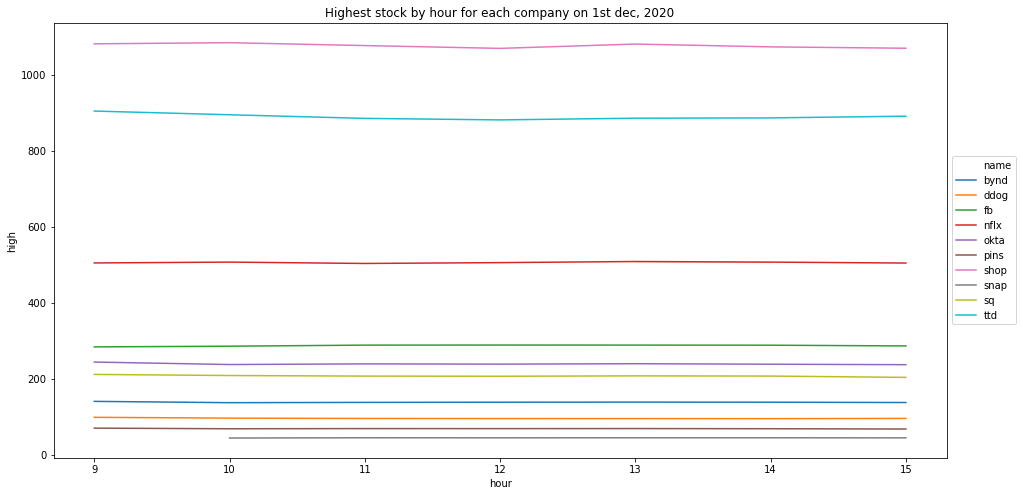

In [18]:
##Line plot for all stocks for the whole day on 1st dec, 2020 by hour

plt.figure(figsize=(16,8))
plt.title('Highest stock by hour for each company on 1st dec, 2020')
sns.lineplot(x='hour',y='high',hue='name',data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## BOX PLOT DISPLAYING HIGHEST STOCK PRICE BY HOUR

Text(0, 0.5, 'High_Stock_Price')

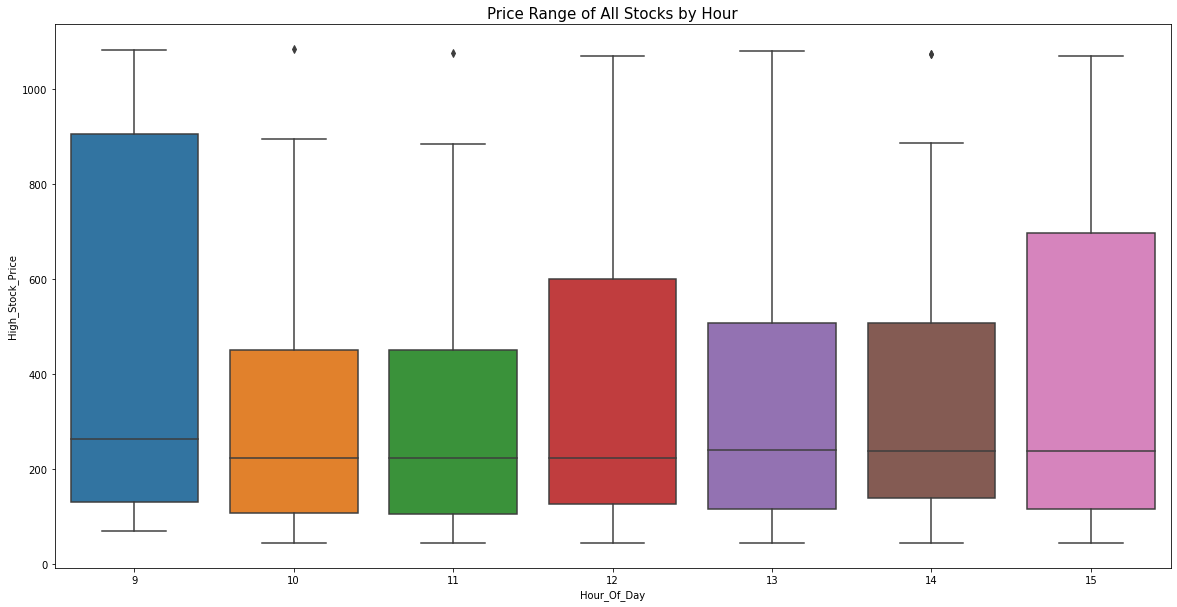

In [16]:
plt.subplots(figsize=(20, 10))
a = sns.boxplot(data = df, x = 'hour', y='high')
plt.title("Price Range of All Stocks by Hour", fontsize=15)
plt.xlabel("Hour_Of_Day")
plt.ylabel("High_Stock_Price")

Text(0.5, 0.98, 'Daily Highest Price for each company')

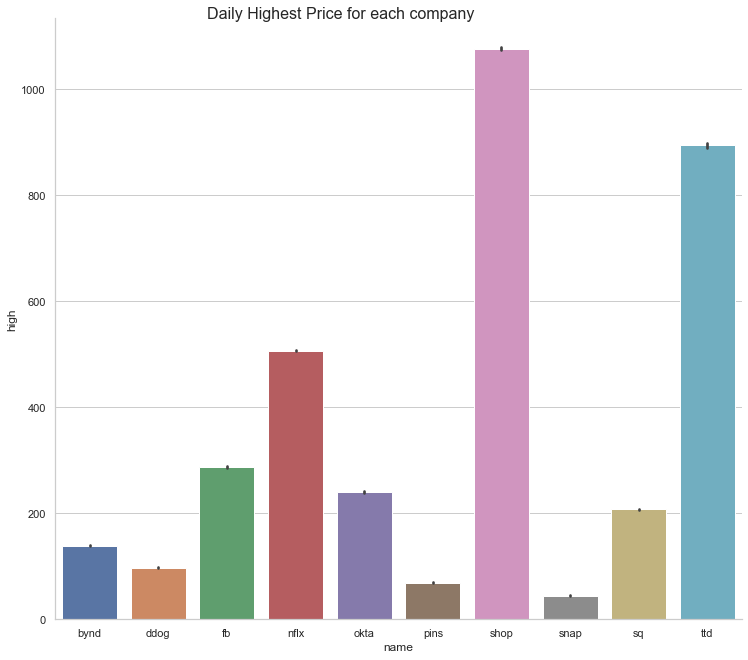

In [61]:
ax2 = sns.catplot(x='name',y='high',data=df, kind='bar')
ax2.fig.set_size_inches(12,10)
ax2.fig.suptitle('Daily Highest Price for each company', fontsize = 16)

## Average Daily Stock price for each company

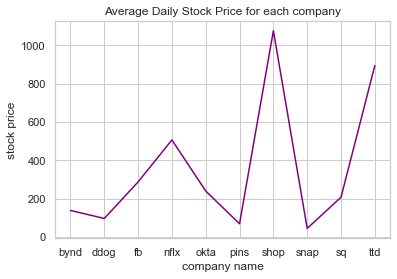

In [62]:
avg_stock = df.groupby('name').mean()['high'].to_frame()
plt.plot(avg_stock,color='purple')
plt.title('Average Daily Stock Price for each company')
plt.xlabel('company name')
plt.ylabel('stock price')
plt.show()

##  Line plot for all stocks for the whole day on dec 1st, 2020 by hour

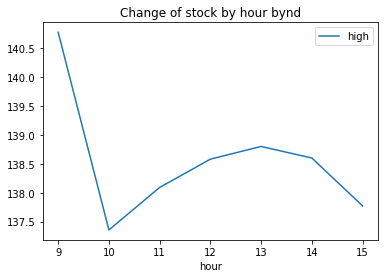

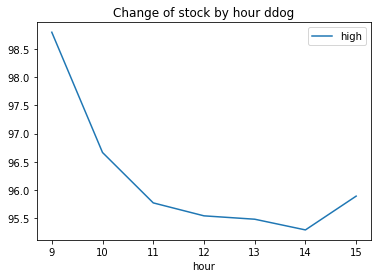

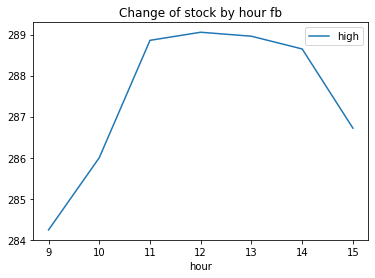

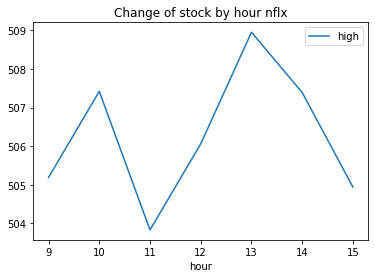

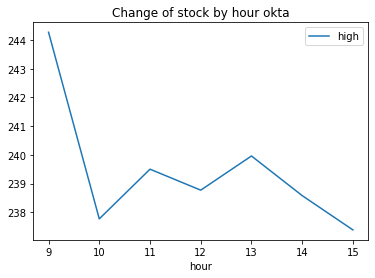

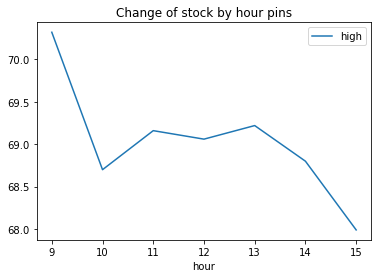

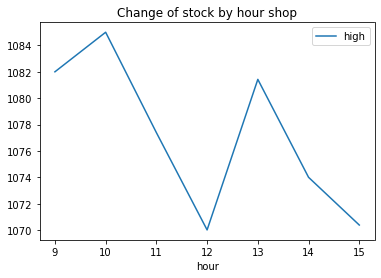

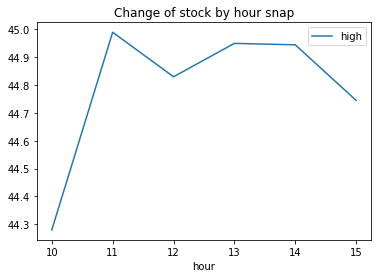

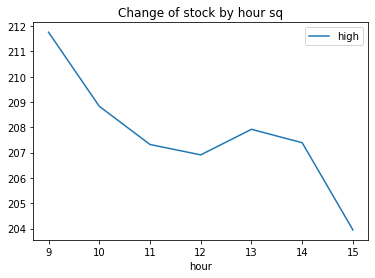

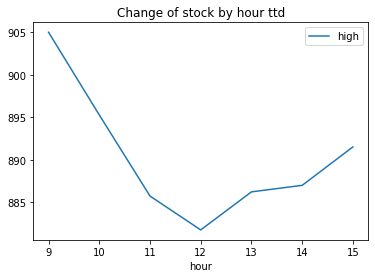

In [24]:
df = df[['name','high','hour']]

for i in df['name'].unique():
    plot = df[df['name'] == i]
    plot.set_index('hour').plot(kind='line')
    plt.title(f'Change of stock by hour {i}')
    plt.show()

## Pivoting the table to group all the data and display price on hourly basis!!

In [25]:
df_pivot = df.pivot_table('high', ['name'], 'hour')
df_pivot

hour,9,10,11,12,13,14,15
name,,,,,,,
bynd,140.777298,137.354996,138.089996,138.580002,138.800003,138.600006,137.771606
ddog,98.800003,96.664703,95.769997,95.540001,95.480003,95.290001,95.889999
fb,284.239990,286.000000,288.859985,289.057098,288.959992,288.649994,286.720001
nflx,505.190002,507.420013,503.831604,506.059998,508.950012,507.390015,504.940002
okta,244.270004,237.770004,239.500000,238.769898,239.960007,238.580002,237.384994
pins,70.320000,68.699997,69.160004,69.059998,69.220001,68.800003,67.989998
shop,1082.000000,1085.000000,1077.390015,1070.010010,1081.426025,1074.000000,1070.380005
snap,NaN,44.279701,44.990002,44.830002,44.950001,44.944801,44.744999
sq,211.755005,208.830002,207.320007,206.910004,207.919998,207.390198,203.945007


## Bivariate analysis

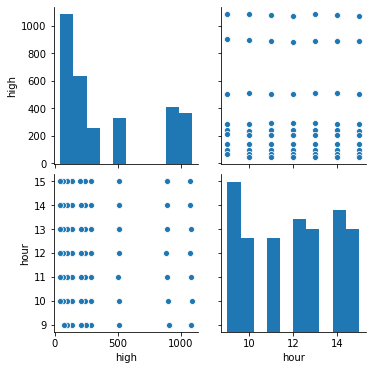

In [26]:
Bivariant = sns.pairplot(df)

Text(45.0, 0.5, 'High_Stock_Price')

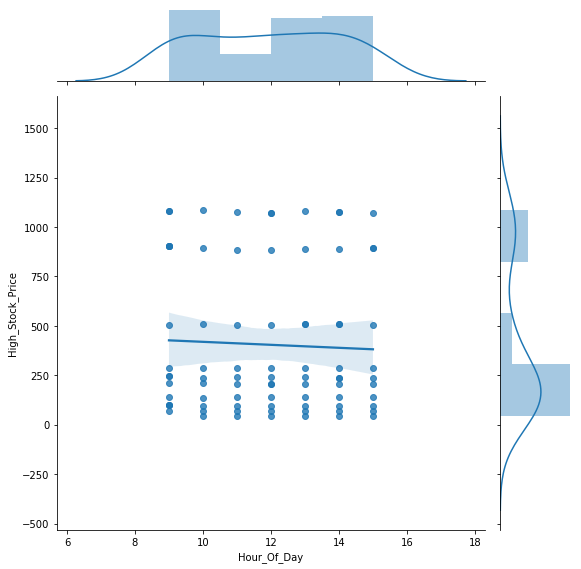

In [27]:
sns.jointplot(x = "hour", y = "high", data=df, kind="reg", height = 8)
plt.xlabel("Hour_Of_Day")
plt.ylabel("High_Stock_Price")

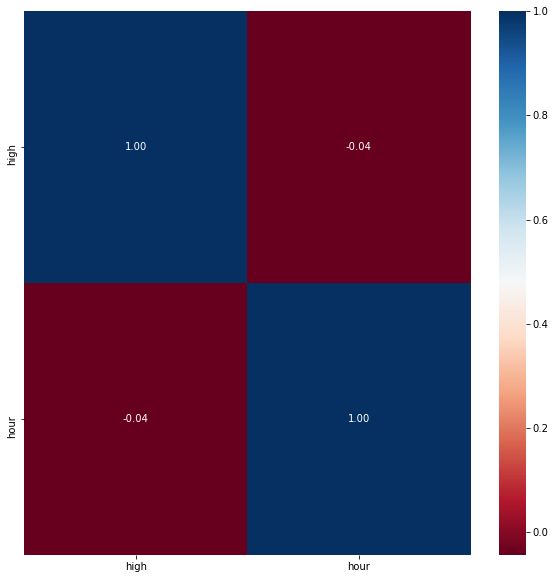

In [28]:
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", ax=ax)
plt.show()

## Time series - Stockprice per hour

In [37]:
df = pd.read_csv('results.csv')
df.head()
ridership_ts = df['hour']
print(ridership_ts.head())
ridership_ts.index = df['name']
print(ridership_ts.head())


0     9
1    10
2    11
3    12
4    13
Name: hour, dtype: int64
name
bynd     9
bynd    10
bynd    11
bynd    12
bynd    13
Name: hour, dtype: int64


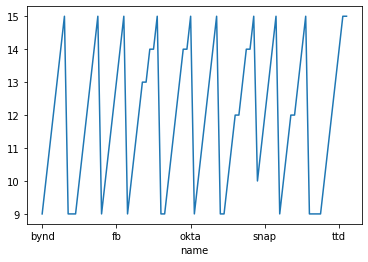

In [38]:
ridership_ts.plot()

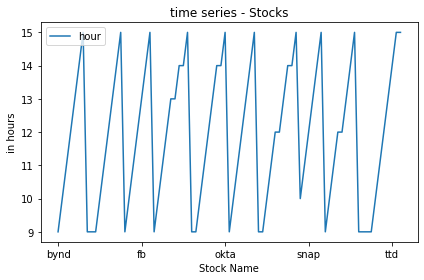

In [43]:
ridership_ts.plot(legend = True)
plt.xlabel('Stock Name')  # set x-axis label
plt.ylabel('in hours')  # set y-axis label
plt.title('time series - Stocks')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Range of hourly high stock for each hour by all companies combined')

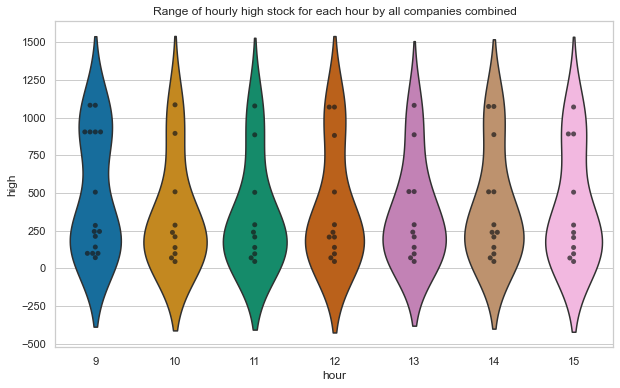

In [54]:

## Violin chart showing distrubution range of high stocks for all companies together for 1 st dec, 2020 by each hour.

plt.figure(figsize=(10,6))
 
sns.violinplot(x='hour',
               y='high', 
               data=df, 
               inner=None, 
               palette='colorblind')
 
sns.swarmplot(x='hour', 
              y='high', 
              data=df, 
              color='k',
              alpha=0.7) 
 
# Set title with matplotlib
plt.title('Range of hourly high stock for each hour by all companies combined')